# **Modeling**

Doing classification modeling to find the best model with the best performance that can be depolyed and used to predict the risk of customers defaulting their loan

This is a classification task and we are going to use classification algorithms to build a model that will have the best performance. the algorithms to use are:


1.   logistic Regression
2.   Decision Tree

1.   K Nearest Neighbor(KNN)
2.  Random Forest

1.   neural networks
2.   List item






In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.mertic ImportWarning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')





In [ ]:
# Load the ml data from the CSV file
df = pd.read_csv('/content/ml_data.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,2,5,1,1,1000,11,0,0,2
1,25,9600,0,1,3,2,5500,12,1,0,3
2,23,65500,3,4,3,2,35000,15,1,0,2
3,24,54400,3,8,3,2,35000,14,1,1,4
4,21,9900,2,2,5,0,2500,7,1,0,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28120 entries, 0 to 28119
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   person_age                  28120 non-null  int64
 1   person_income               28120 non-null  int64
 2   person_home_ownership       28120 non-null  int64
 3   person_emp_length           28120 non-null  int64
 4   loan_intent                 28120 non-null  int64
 5   loan_grade                  28120 non-null  int64
 6   loan_amnt                   28120 non-null  int64
 7   loan_int_rate               28120 non-null  int64
 8   loan_status                 28120 non-null  int64
 9   cb_person_default_on_file   28120 non-null  int64
 10  cb_person_cred_hist_length  28120 non-null  int64
dtypes: int64(11)
memory usage: 2.4 MB


**Model Training**

In [ ]:
#separate the target variable with the other independent features
# Resources
X = df.drop(columns=['loan_status'], axis=1)

# Target variable
y = df['loan_status']

In [ ]:
print(X.shape)
print(y.shape)

(28120, 10)
(28120,)


In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


The dataset was not balanced as class'0' were the majority compared to the class'1'. This imbalance can lead to bais as the model performing well on the majority class compared to the minority class. Therefore employ the use of oversampling technique called 'SMOTE'(sythentic minority over sampling technique.)

. When to Use: When oversampling is needed but duplicating the same samples might cause overfitting.

. Method: Generates synthetic samples from the minority class by interpolating between existing minority class samples.

. Benefit: Reduces the risk of overfitting by creating new, synthetic examples rather than duplicating existing ones..

In [ ]:
# Scaling the features
#intializing the standardscalar
scaler = StandardScaler()

#fitting the scaler to the training data(calculates the mean and std)
scaler.fit(X_train_smote)

#transforming the training data(Standardizing it)
X_train_scaled =scaler.transform(X_train_smote)

#X_train_scaled = scaler.fit_transform(X_train_)
X_test_scaled = scaler.transform(X_test)


Scaling the features using 'standardscalar' involves fitting the scalar on the training data and then transforming both the training and test data.

fitting the StandardScaler on the training data '(scaler.fit(X_train))'
, it calculates the mean and standard deviation of each feature based on the training data. These statistics are then used to transform both the training and test data. This approach is important for several reasons:



1.   Avoid data leakage
2.   consistent transformation

1.   Realistic transformation








DecisionTree

In [ ]:
# Initialize and train different models

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train_smote)
y_pred_log_reg = log_reg.predict(X_test_scaled)
print("Logistic Regression")
print(classification_report(y_test, y_pred_log_reg))
print(f'Accuracy: {accuracy_score(y_test, y_pred_log_reg)}')
print('...............................................................................................')

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_smote)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree")
print(classification_report(y_test, y_pred_dt))
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt)}')
print('.....................................................................................................')

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_smote)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print('...........................................................................................................')

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train_scaled, y_train_smote)
y_pred_svm = svm.predict(X_test_scaled)
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print('...............................................................................................................')

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_scaled, y_train_smote)
y_pred_gb = gb.predict(X_test_scaled)
print("Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print(f'Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print('................................................................................................................')

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train_smote)
y_pred_knn = knn.predict(X_test_scaled)
print("K-Nearest Neighbors")
print(classification_report(y_test, y_pred_knn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_knn)}')
print('...........................................................................................................')

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train_smote)
y_pred_nb = nb.predict(X_test_scaled)
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb)}')


Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.75      0.82      4419
           1       0.45      0.75      0.56      1205

    accuracy                           0.75      5624
   macro avg       0.68      0.75      0.69      5624
weighted avg       0.82      0.75      0.77      5624

Accuracy: 0.7467994310099573
...............................................................................................
Decision Tree
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4419
           1       0.58      0.76      0.66      1205

    accuracy                           0.83      5624
   macro avg       0.76      0.81      0.77      5624
weighted avg       0.85      0.83      0.84      5624

Accuracy: 0.8319701280227596
.....................................................................................................
Random Forest
              precision    recall  f1-scor

RandomForest is has an accuracy of approximately 88% which is the best of the models

**Hyperparameter Tuning using GridSearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the model
grid_search.fit(X_train_scaled, y_train_smote)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_scaled)
print("Tuned Random Forest")
print(classification_report(y_test, y_pred_best_rf))
print(f'Accuracy: {accuracy_score(y_test, y_pred_best_rf)}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned Random Forest
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4419
           1       0.73      0.74      0.74      1205

    accuracy                           0.89      5624
   macro avg       0.83      0.83      0.83      5624
weighted avg       0.89      0.89      0.89      5624

Accuracy: 0.8872688477951636


Used GridSearch hyperparameter to tune the randomforest model(optimise the machine learning model to have an optimal performance) to have an accuracy of about 89%.

These parameters were found to be the best combination for your Random Forest model:

. bootstrap = False: The model does not use bootstrap sampling, meaning it uses the entire dataset to build each tree.

. max_depth = 30: The maximum depth of the trees is 30. This controls the maximum number of splits in each tree.

. min_samples_leaf = 1: The minimum number of samples required to be at a leaf node is 1. This allows the trees to grow as deep as possible.

. min_samples_split = 2: The minimum number of samples required to split an internal node is 2.

.*.*n_estimators** = 300: The number of trees in the forest is 300. More trees generally improve the model's performance up to a point..


explanation of the results:



*   Accuracy (0.8881): This means that approximately 88.8% of the predictions made by the model on the test set were correct.
*   LPrecision for class 0 (0.93): Out of all the samples that were predicted as class 0, 93% were actually class 0.

*   Recall for class 0 (0.93): Out of all the samples that are actually class 0, 93% were correctly identified by the model.
*   F1-score for class 0 (0.93): The harmonic mean of precision and recall for class 0, providing a balance between the two.

*   Precision for class 1 (0.74): Out of all the samples that were predicted as class 1, 74% were actually class 1.
*   Recall for class 1 (0.74): Out of all the samples that are actually class 1, 74% were correctly identified by the model.

*   F1-score for class 1 (0.74): The harmonic mean of precision and recall for class 1.
*   Macro avg (Precision: 0.83, Recall: 0.84, F1-score: 0.83): The average precision, recall, and f1-score, treating all classes equally.

*   Weighted avg (Precision: 0.89, Recall: 0.89, F1-score: 0.89): The average precision, recall, and f1-score, weighted by the number of samples in each class.
*   List item










**Feature importance Analysis**

Analyze the importance of each feature in the Random Forest model to understand which features are contributing the most to predictions.

                      Feature  Importance
1               person_income    0.274913
6                   loan_amnt    0.183667
7               loan_int_rate    0.093111
4                 loan_intent    0.090006
5                  loan_grade    0.088171
2       person_home_ownership    0.082013
3           person_emp_length    0.066085
0                  person_age    0.060071
9  cb_person_cred_hist_length    0.047822
8   cb_person_default_on_file    0.014141


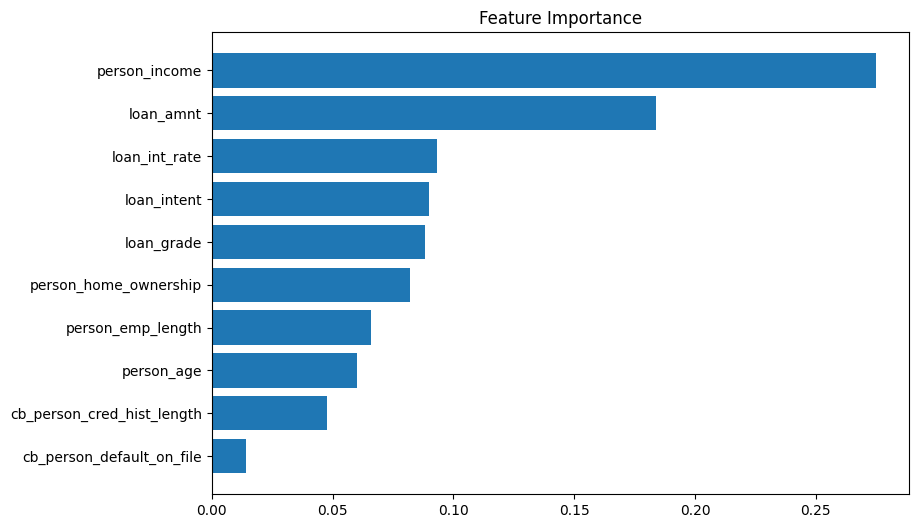

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the best model
importances = best_rf.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(9, 6))
plt.title('Feature Importance')
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.gca().invert_yaxis()
plt.show()


**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train_scaled, y_train_smote, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.87770609 0.90681004 0.92973903 0.91955836 0.92486378]
Mean cross-validation score: 0.9117354598184964


Cross-validation is a technique used to evaluate the performance and generalizability of a machine learning model. By splitting the dataset into multiple folds, it helps ensure that the model's performance is not overly dependent on any single subset of the data.

**Model Evaluation**

To ensure that the model performs well across different subsets of the data, perform cross-validation.

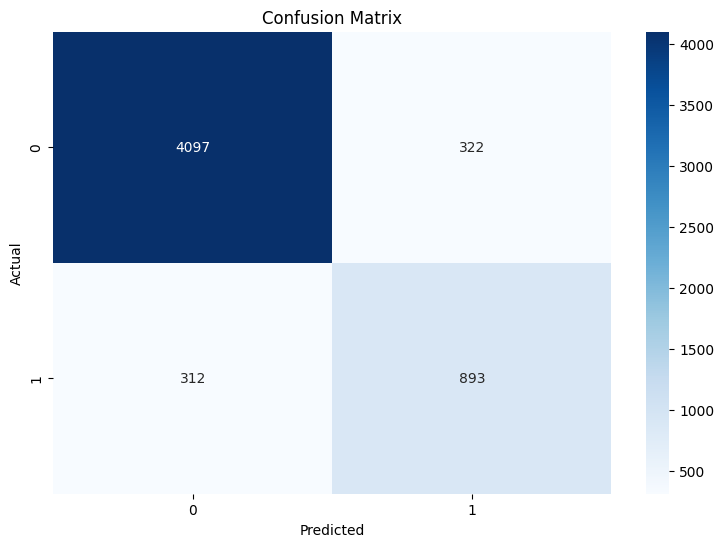

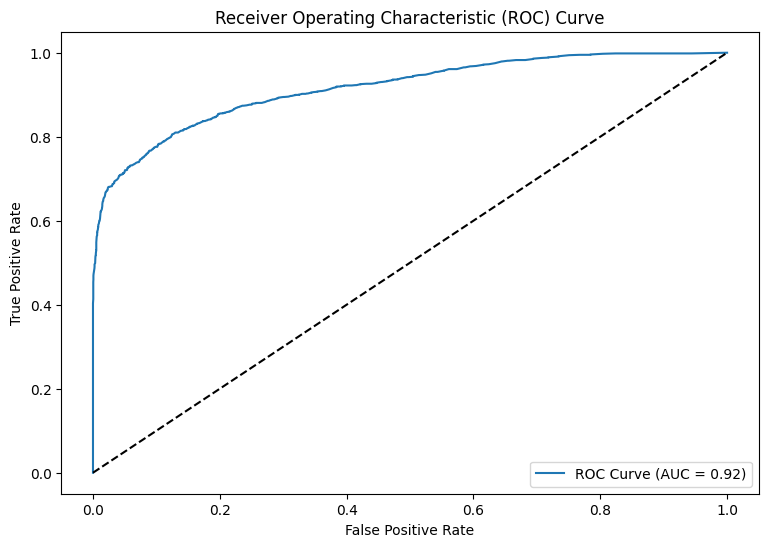

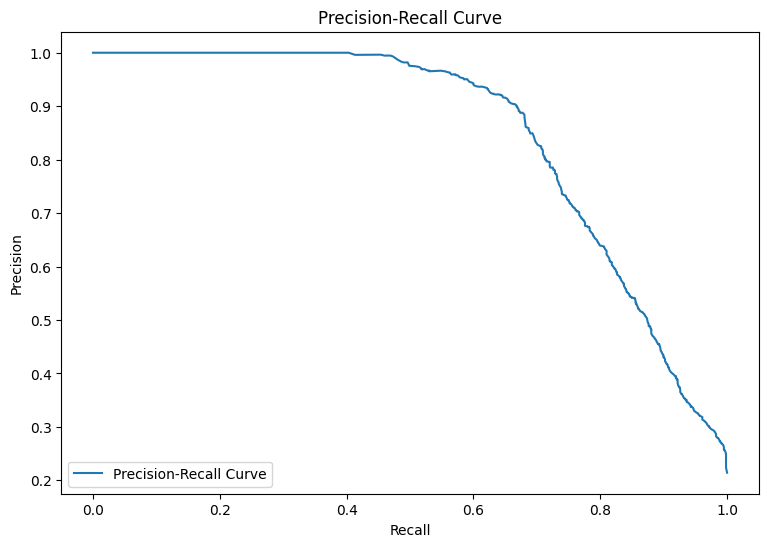

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Score
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(9,6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve and AUC Score
y_proba = best_rf.predict_proba(X_test_scaled)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(9,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(9,6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


Confusion Matrix: The model has a good balance between true positives and true negatives, but there's still a significant number of false
positives and false negatives.

Precision-Recall Curve: The curve shows the model maintains high precision until recall reaches around 0.8, after which precision drops.

ROC Curve: The high AUC of 0.92 indicates the model has a strong ability to distinguish between classes.

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predicted probabilities
y_probs = best_rf.predict_proba(X_test_scaled)[:, 1]

# Adjust the threshold
threshold = 0.6
y_pred_threshold = (y_probs >= threshold).astype(int)

# Evaluate with the new threshold
print(confusion_matrix(y_test, y_pred_threshold))
print(classification_report(y_test, y_pred_threshold))


[[4215  204]
 [ 349  856]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      4419
           1       0.81      0.71      0.76      1205

    accuracy                           0.90      5624
   macro avg       0.87      0.83      0.85      5624
weighted avg       0.90      0.90      0.90      5624



saving the model:

In [ ]:
import joblib

# Save the final model to a file
joblib.dump(best_rf, 'final_tuned_random_forest_model.pkl')


['final_tuned_random_forest_model.pkl']

Downloading the save model to local machine

In [ ]:
import joblib

# Assuming `best_rf` is your trained model
joblib.dump(best_rf, 'final_tuned_random_forest_model.pkl')


['final_tuned_random_forest_model.pkl']

In [ ]:
from google.colab import files

# Download the saved model file
files.download('final_tuned_random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>